In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [40]:
df=pd.read_csv("archive/IRIS.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
133,6.3,2.8,5.1,1.5,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


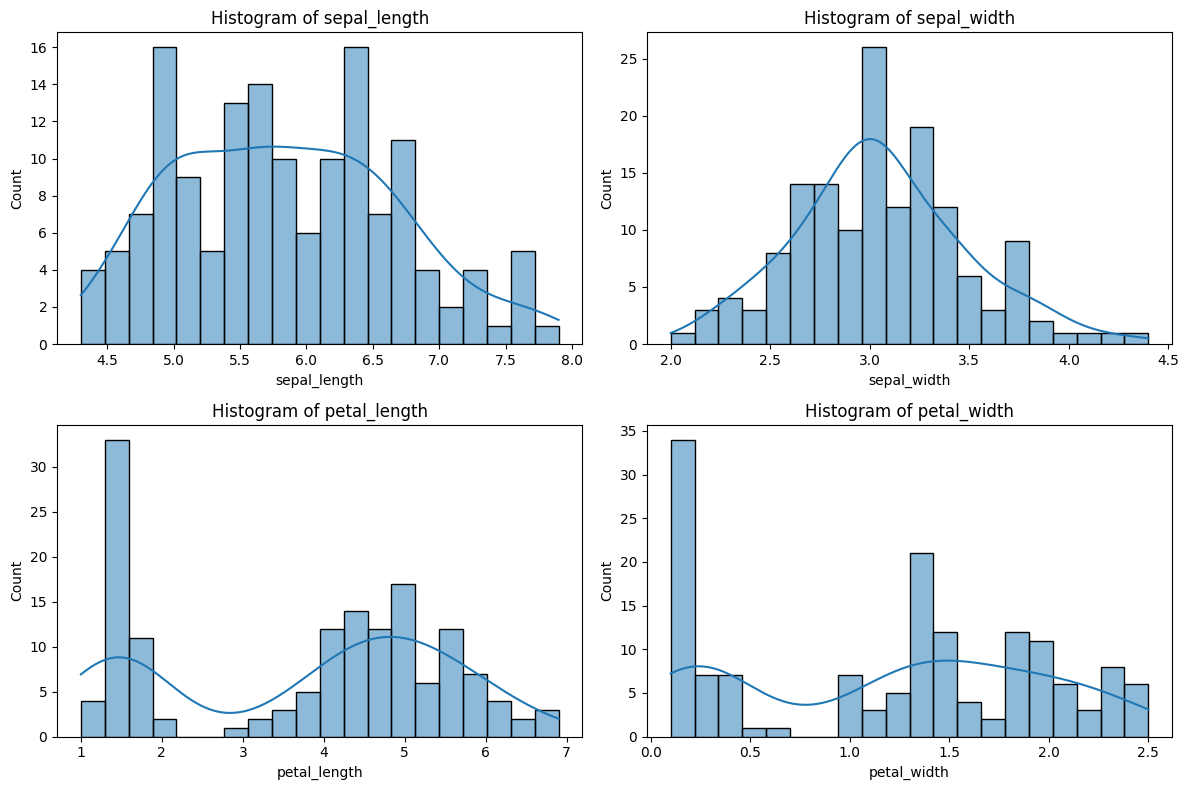

In [43]:
# Define the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms with density lines for each column
for i, col in enumerate(df.columns[:4]):  # Select only the first 4 columns
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

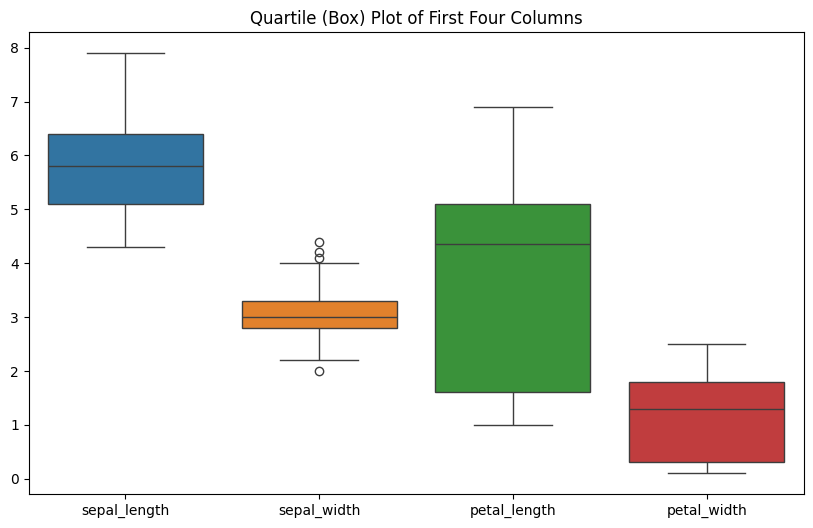

In [44]:
# Define the figure size
plt.figure(figsize=(10, 6))

# Create a box plot for all four columns
sns.boxplot(data=df.iloc[:, :4])  # Select first four columns

# Set the title
plt.title("Quartile (Box) Plot of First Four Columns")

# Show the plot
plt.show()

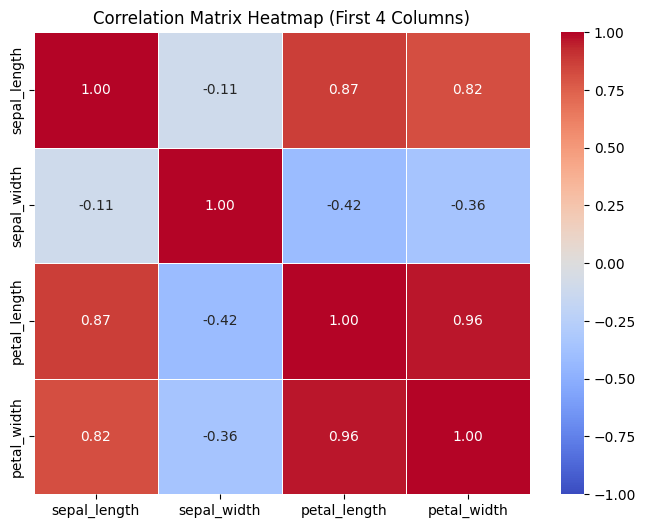

In [45]:
# Compute correlation matrix for the first 4 columns
corr_matrix = df.iloc[:, :4].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Set title
plt.title("Correlation Matrix Heatmap (First 4 Columns)")

# Show plot
plt.show()

In [46]:
# Custom Transformer for Outlier Removal
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=3.0):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self  # No fitting needed
    
    def transform(self, X, y=None):
        z_scores = np.abs((X - X.mean()) / X.std())  # Compute Z-scores
        mask = (z_scores < self.threshold).all(axis=1)  # Mask for non-outliers
        if y is None:
            return X[mask]
        return X[mask], y[mask]  # Return filtered X and y together

In [47]:
# Define pipeline
pipeline = Pipeline([
    ("scaling", StandardScaler()),  # Standardize (zero mean, unit variance)
    ("normalization", MinMaxScaler())  # Normalize (0 to 1 range)
])

In [48]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=["number"]).columns
df_numeric = df[numeric_columns]

# Apply pipeline
df_transformed = pipeline.fit_transform(df_numeric)

# Convert back to DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=numeric_columns)

# Show results
print(df_transformed.head())

   sepal_length  sepal_width  petal_length  petal_width
0      0.222222     0.625000      0.067797     0.041667
1      0.166667     0.416667      0.067797     0.041667
2      0.111111     0.500000      0.050847     0.041667
3      0.083333     0.458333      0.084746     0.041667
4      0.194444     0.666667      0.067797     0.041667


In [49]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [50]:
df_transformed.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


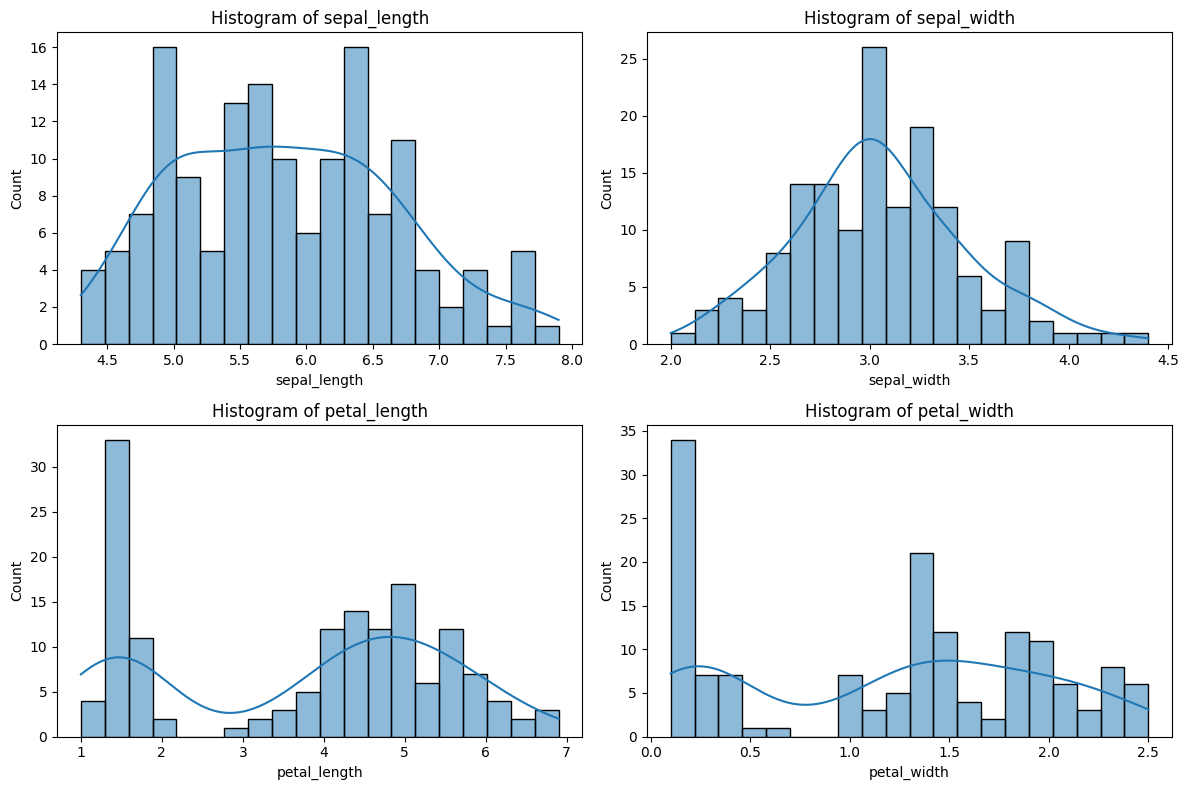

In [51]:
# Define the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms with density lines for each column
for i, col in enumerate(df_transformed.columns[:4]):  # Select only the first 4 columns
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

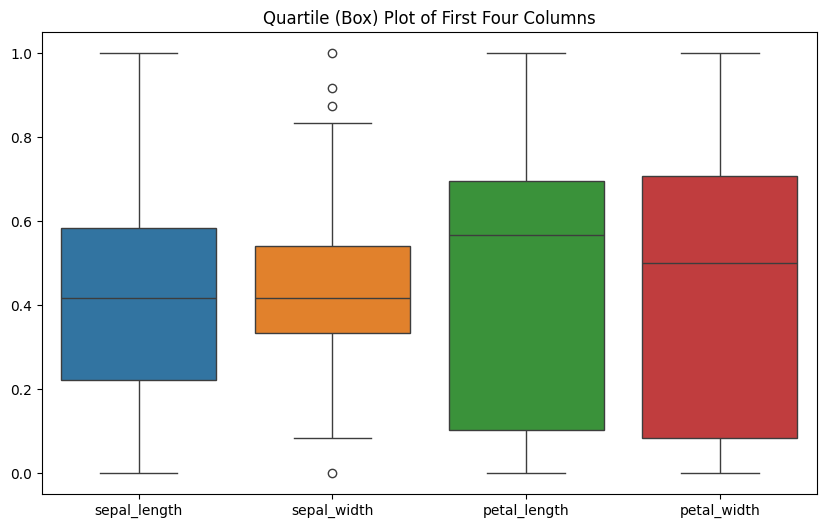

In [52]:
# Define the figure size
plt.figure(figsize=(10, 6))

# Create a box plot for all four columns
sns.boxplot(data=df_transformed.iloc[:, :4])  # Select first four columns

# Set the title
plt.title("Quartile (Box) Plot of First Four Columns")

# Show the plot
plt.show()

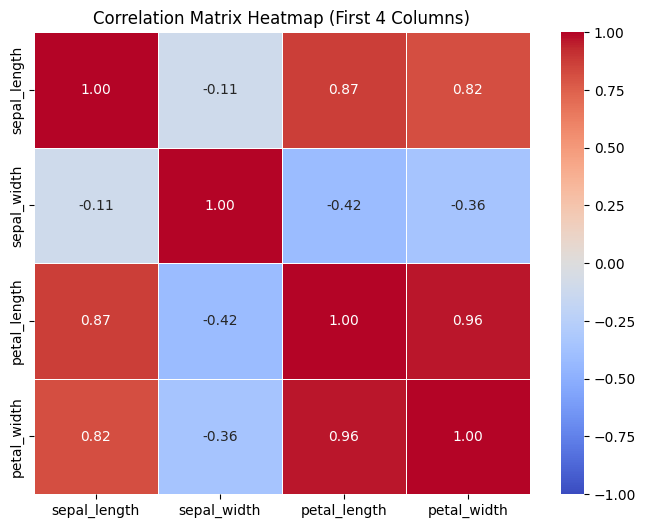

In [53]:
# Compute correlation matrix for the first 4 columns
corr_matrix = df_transformed.iloc[:, :4].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Set title
plt.title("Correlation Matrix Heatmap (First 4 Columns)")

# Show plot
plt.show()

In [54]:
# Define features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]   # Last column as target

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=["number"]).columns

# Fit pipeline on training data & transform both train and test sets
X_train_transformed = pipeline.fit_transform(X_train)  # Fit on train
X_test_transformed = pipeline.transform(X_test)  # Transform test

# Convert back to DataFrame
X_train_transformed = pd.DataFrame(X_train_transformed, columns=numeric_columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=numeric_columns)

# Show results
print("Transformed Training Data:\n", X_train_transformed.head())
print("Transformed Testing Data:\n", X_test_transformed.head())

Transformed Training Data:
    sepal_length  sepal_width  petal_length  petal_width
0      0.088235     0.666667      0.000000     0.041667
1      0.411765     1.000000      0.087719     0.125000
2      0.705882     0.458333      0.596491     0.541667
3      0.147059     0.583333      0.105263     0.041667
4      0.029412     0.500000      0.052632     0.041667
Transformed Testing Data:
    sepal_length  sepal_width  petal_length  petal_width
0      0.529412     0.333333      0.649123     0.458333
1      0.411765     0.750000      0.122807     0.083333
2      1.000000     0.250000      1.035088     0.916667
3      0.500000     0.375000      0.614035     0.583333
4      0.735294     0.333333      0.666667     0.541667


In [56]:
print(y_train)
print(y_test)

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: species, Length: 120, dtype: object
73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: species, 

In [57]:
# List of models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (Linear Kernel)": SVC(kernel="linear"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)  # Same as before
}

In [58]:
# Evaluate all models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_transformed, y_train)

    # Cross-Validation Score (5-Fold CV)
    cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5)
    
    # Test Accuracy
    y_pred = model.predict(X_test_transformed)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        "CV Mean Accuracy": cv_scores.mean(),
        "Test Accuracy": test_accuracy
    }
    
    # Print Classification Report
    print(f"\n🔹 Model: {name}")
    print(f"   Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"   Mean CV Accuracy: {cv_scores.mean():.2f}")
    print(f"   Test Accuracy: {test_accuracy:.2f}")
    print(classification_report(y_test, y_pred))


🔹 Model: Logistic Regression
   Cross-Validation Accuracy Scores: [0.83333333 1.         0.83333333 0.95833333 0.91666667]
   Mean CV Accuracy: 0.91
   Test Accuracy: 0.97
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30


🔹 Model: KNN (k=5)
   Cross-Validation Accuracy Scores: [0.95833333 1.         0.875      1.         0.95833333]
   Mean CV Accuracy: 0.96
   Test Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                 

In [59]:
# Print summary of all models
print("\n🔹 Model Comparison Summary:")
for model_name, scores in results.items():
    print(f"{model_name}: CV Mean Accuracy = {scores['CV Mean Accuracy']:.2f}, Test Accuracy = {scores['Test Accuracy']:.2f}")


🔹 Model Comparison Summary:
Logistic Regression: CV Mean Accuracy = 0.91, Test Accuracy = 0.97
KNN (k=5): CV Mean Accuracy = 0.96, Test Accuracy = 1.00
SVM (Linear Kernel): CV Mean Accuracy = 0.94, Test Accuracy = 1.00
Decision Tree: CV Mean Accuracy = 0.95, Test Accuracy = 1.00
Random Forest: CV Mean Accuracy = 0.94, Test Accuracy = 1.00


In [60]:
# Load dataset
df = pd.read_csv("archive/IRIS.csv")

# Use string labels directly (no encoding)
X = df.iloc[:, :-1]  # Features (first 4 columns)
y = df.iloc[:, -1]   # Target (species)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with preprocessing and model
pipeline = Pipeline([
    ("scaling", StandardScaler()),
    ("normalization", MinMaxScaler()),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

# Train pipeline
pipeline.fit(X_train, y_train)

# Evaluate performance
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
test_accuracy = pipeline.score(X_test, y_test)

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save pipeline
joblib.dump(pipeline, "iris_pipeline.pkl")

print("Pipeline saved successfully in 'iris_pipeline.pkl'!")

Cross-Validation Accuracy Scores: [0.95833333 1.         0.875      1.         0.95833333]
Mean CV Accuracy: 0.96
Test Accuracy: 1.00
Pipeline saved successfully in 'iris_pipeline.pkl'!
